# Chapter 4.1: Mean Estimation for Simulated Spirals

Load packages.

In [24]:
devtools::install("../../elasticproc2d", quiet=TRUE, quick=TRUE)
library(elasticproc2d)

ERROR: Error in (function (command = NULL, args = character(), error_on_status = TRUE, : System command 'R' failed, exit status: 3, stdout + stderr:
E> * installing to library ‘/home/mnl/.R/x86_64-pc-linux-gnu-library/4.1’
E> ERROR: failed to lock directory ‘/home/mnl/.R/x86_64-pc-linux-gnu-library/4.1’ for modifying
E> Try removing ‘/home/mnl/.R/x86_64-pc-linux-gnu-library/4.1/00LOCK-elasticproc2d’


In [ ]:
library(dplyr)
library(viridis)
library(RColorBrewer)
library(ggplot2)
library(gridExtra)

Settings.

In [ ]:
theme_thesis <- function(){ 
    theme_bw() %+replace%    #replace elements we want to change
    theme()
}

# Display plots in smaller size
options(repr.plot.width=10, repr.plot.height=6)

Load datasets:
1. Spirals
2. Spirals + Random Rotation / Scaling / Translation

In [ ]:
source("../scripts/load_datasets.R")

In [ ]:
set.seed(18)
spirals <- curves.spiral(n_curves = 10, rotate=FALSE, scale=FALSE, center=FALSE)
set.seed(18)
spirals.centered <- curves.spiral(n_curves = 10, rotate=FALSE, scale=FALSE, center=TRUE)

In [ ]:
set.seed(18)
spirals.eucl <- curves.spiral(n_curves = 10, rotate=TRUE, scale=TRUE, center=FALSE, translate=TRUE)
set.seed(18)
spirals.eucl.centered <- curves.spiral(n_curves = 10, rotate=TRUE, scale=TRUE, center=TRUE, translate=TRUE)

#### Estimate mean for Spirals and Spirals + Eucl Transforms.

In [25]:
penalty <- 2
knots <- seq(0,1,length=13)
knots.poly <- seq(0,1,length=13)

1. Elastic Mean

In [ ]:
e.mean.smooth <- elasdics::compute_elastic_mean(spirals, knots=knots, type = "smooth")
e.mean.poly <- elasdics::compute_elastic_mean(spirals, knots=knots.poly, type = "polygon")
e.mean.eucl.smooth <- elasdics::compute_elastic_mean(spirals.eucl, knots=knots, type = "smooth")
e.mean.eucl.poly <- elasdics::compute_elastic_mean(spirals.eucl, knots=knots.poly, type = "polygon")

2. Full Procrustes Mean

In [ ]:
fp.mean.smooth <- compute_elastic_proc2d_mean(spirals, knots = knots, type = "smooth", penalty = penalty, max_iter=0)
fp.mean.poly <- compute_elastic_proc2d_mean(spirals, knots = knots.poly, type = "polygon", penalty = penalty, max_iter=0)
fp.mean.eucl.smooth <- compute_elastic_proc2d_mean(spirals.eucl, knots = knots, type = "smooth", penalty = penalty, max_iter=0)
fp.mean.eucl.poly <- compute_elastic_proc2d_mean(spirals.eucl, knots = knots.poly, type = "polygon", penalty = penalty, max_iter=0)

3. Elastic Full Procrustes Mean

In [22]:
efp.mean.smooth <- compute_elastic_proc2d_mean(spirals, knots = knots, type = "smooth", penalty = penalty)
efp.mean.poly <- compute_elastic_proc2d_mean(spirals, knots = knots.poly, type = "polygon", penalty = penalty)
efp.mean.eucl.smooth <- compute_elastic_proc2d_mean(spirals.eucl, knots = knots, type = "smooth", penalty = penalty)
efp.mean.eucl.poly <- compute_elastic_proc2d_mean(spirals.eucl, knots = knots.poly, type = "polygon", penalty = penalty)

Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”


               [,1]          [,2]          [,3]         [,4]         [,5]
 [1,]  1.551008e-01  0.000000e+00  0.000000e+00 0.000000e+00 0.000000e+00
 [2,]  6.100423e-02  2.276709e-01  0.000000e+00 0.000000e+00 0.000000e+00
 [3,]  2.152456e-18  6.100423e-02  2.276709e-01 0.000000e+00 0.000000e+00
 [4,]  1.076228e-18  0.000000e+00  6.100423e-02 2.276709e-01 0.000000e+00
 [5,]  0.000000e+00  0.000000e+00  0.000000e+00 6.100423e-02 2.276709e-01
 [6,]  7.467832e-36 -2.116510e-19  5.671170e-20 3.159568e-18 6.100423e-02
 [7,] -9.640306e-21  7.088963e-21 -2.835585e-20 1.134234e-19 6.319137e-18
 [8,]  5.717123e-21  2.379801e-20  3.544481e-21 1.974730e-19 1.693208e-18
 [9,]  3.782767e-22  5.949502e-21  1.411430e-20 9.873651e-20 4.233019e-19
[10,] -3.012596e-22 -6.052315e-22  2.642456e-21 1.772241e-21 4.582378e-20
[11,] -8.933004e-23 -3.718439e-22 -5.538252e-23 2.215301e-22 3.879843e-20
[12,] -3.043709e-23 -6.551823e-23 -1.374622e-22 1.431993e-21 1.036420e-20
[13,]  0.000000e+00  0.000000e+00  0.0

Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”


               [,1]          [,2]          [,3]         [,4]         [,5]
 [1,]  1.551008e-01  0.000000e+00  0.000000e+00 0.000000e+00 0.000000e+00
 [2,]  6.100423e-02  2.276709e-01  0.000000e+00 0.000000e+00 0.000000e+00
 [3,]  2.152456e-18  6.100423e-02  2.276709e-01 0.000000e+00 0.000000e+00
 [4,]  1.076228e-18  0.000000e+00  6.100423e-02 2.276709e-01 0.000000e+00
 [5,]  0.000000e+00  0.000000e+00  0.000000e+00 6.100423e-02 2.276709e-01
 [6,]  7.467832e-36 -2.116510e-19  5.671170e-20 3.159568e-18 6.100423e-02
 [7,] -9.640306e-21  7.088963e-21 -2.835585e-20 1.134234e-19 6.319137e-18
 [8,]  5.717123e-21  2.379801e-20  3.544481e-21 1.974730e-19 1.693208e-18
 [9,]  3.782767e-22  5.949502e-21  1.411430e-20 9.873651e-20 4.233019e-19
[10,] -3.012596e-22 -6.052315e-22  2.642456e-21 1.772241e-21 4.582378e-20
[11,] -8.933004e-23 -3.718439e-22 -5.538252e-23 2.215301e-22 3.879843e-20
[12,] -3.043709e-23 -6.551823e-23 -1.374622e-22 1.431993e-21 1.036420e-20
[13,]  0.000000e+00  0.000000e+00  0.0

Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”


               [,1]          [,2]          [,3]         [,4]         [,5]
 [1,]  1.551008e-01  0.000000e+00  0.000000e+00 0.000000e+00 0.000000e+00
 [2,]  6.100423e-02  2.276709e-01  0.000000e+00 0.000000e+00 0.000000e+00
 [3,]  2.152456e-18  6.100423e-02  2.276709e-01 0.000000e+00 0.000000e+00
 [4,]  1.076228e-18  0.000000e+00  6.100423e-02 2.276709e-01 0.000000e+00
 [5,]  0.000000e+00  0.000000e+00  0.000000e+00 6.100423e-02 2.276709e-01
 [6,]  7.467832e-36 -2.116510e-19  5.671170e-20 3.159568e-18 6.100423e-02
 [7,] -9.640306e-21  7.088963e-21 -2.835585e-20 1.134234e-19 6.319137e-18
 [8,]  5.717123e-21  2.379801e-20  3.544481e-21 1.974730e-19 1.693208e-18
 [9,]  3.782767e-22  5.949502e-21  1.411430e-20 9.873651e-20 4.233019e-19
[10,] -3.012596e-22 -6.052315e-22  2.642456e-21 1.772241e-21 4.582378e-20
[11,] -8.933004e-23 -3.718439e-22 -5.538252e-23 2.215301e-22 3.879843e-20
[12,] -3.043709e-23 -6.551823e-23 -1.374622e-22 1.431993e-21 1.036420e-20
[13,]  0.000000e+00  0.000000e+00  0.0

Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”


               [,1]          [,2]          [,3]         [,4]         [,5]
 [1,]  1.551008e-01  0.000000e+00  0.000000e+00 0.000000e+00 0.000000e+00
 [2,]  6.100423e-02  2.276709e-01  0.000000e+00 0.000000e+00 0.000000e+00
 [3,]  2.152456e-18  6.100423e-02  2.276709e-01 0.000000e+00 0.000000e+00
 [4,]  1.076228e-18  0.000000e+00  6.100423e-02 2.276709e-01 0.000000e+00
 [5,]  0.000000e+00  0.000000e+00  0.000000e+00 6.100423e-02 2.276709e-01
 [6,]  7.467832e-36 -2.116510e-19  5.671170e-20 3.159568e-18 6.100423e-02
 [7,] -9.640306e-21  7.088963e-21 -2.835585e-20 1.134234e-19 6.319137e-18
 [8,]  5.717123e-21  2.379801e-20  3.544481e-21 1.974730e-19 1.693208e-18
 [9,]  3.782767e-22  5.949502e-21  1.411430e-20 9.873651e-20 4.233019e-19
[10,] -3.012596e-22 -6.052315e-22  2.642456e-21 1.772241e-21 4.582378e-20
[11,] -8.933004e-23 -3.718439e-22 -5.538252e-23 2.215301e-22 3.879843e-20
[12,] -3.043709e-23 -6.551823e-23 -1.374622e-22 1.431993e-21 1.036420e-20
[13,]  0.000000e+00  0.000000e+00  0.0

Function for mean plot. Use colorblind friendly "paired" palette.

In [23]:
palette <- brewer.pal(6, "Paired")

In [12]:
means <- list(
    list(e.mean.smooth, e.mean.poly),
    list(fp.mean.smooth, fp.mean.poly),
    list(efp.mean.smooth, efp.mean.poly)
    )
means.eucl <- list(
    list(e.mean.eucl.smooth, e.mean.eucl.poly),
    list(fp.mean.eucl.smooth, fp.mean.eucl.poly),
    list(efp.mean.eucl.smooth, efp.mean.eucl.poly)
    )

### Fig 4.1: Means for Spirals without and with rotation / translation / scaling.

Save data curve splot.

In [13]:
p.spirals <- ggplot(bind_rows(spirals, .id="id"), aes(x=X1, y=X2)) + 
    geom_path(size=0.5, alpha=0.6, aes(group=id, color=id), show.legend=FALSE) +
    geom_point(size=1, alpha=0.6, aes(group=id, color=id), show.legend=FALSE) +
    labs(x = "$\\Re(\\beta)$", y = "$\\Im(\\beta)$") +
    scale_color_grey() +
    scale_y_continuous(breaks = c(-1,0,1)) + scale_x_continuous(breaks = c(-1,0,1)) +
    coord_fixed(xlim=c(-1,1), ylim=c(-1,1)) + 
    theme_thesis() + 
    theme(aspect.ratio = 1)

p.spirals.eucl <- ggplot(bind_rows(spirals.eucl, .id="id"), aes(x=X1, y=X2)) + 
    geom_path(size=0.25, aes(group=id, color=id), show.legend=FALSE) +
    geom_point(size=0.5, aes(group=id, color=id), show.legend=FALSE) +
    scale_color_grey() +
    labs(x = "$\\Re(\\beta)$", y = "$\\Im(\\beta)$") +
    coord_fixed() + 
    theme_thesis() + theme(aspect.ratio=1)

In [14]:
p.means <- lapply(1:3, function(i){
    if(i == 1){ 
        m.s <- elasdics::get_evals(means[[i]][[1]]) 
        m.p <- elasdics::get_evals(means[[i]][[2]]) 
    } else {
        m.s <- get_evals(means[[i]][[1]])
        m.p <- get_evals(means[[i]][[2]]) 
    }
    p <- ggplot() + 
        geom_path(data=m.p, aes(x=X1, y=X2), size=1, color=palette[2*i-1]) +
        geom_path(data=m.s, aes(x=X1, y=X2), size=1, color=palette[2*i]) + 
        theme_thesis()
    if(i == 1){
        p <- p + labs(x = "$\\Re(\\beta - \\overline\\beta)$", y = "$\\Im(\\beta-\\overline\\beta)$")
        p <- p + coord_fixed(xlim=c(-1,1), ylim=c(-1,1), clip="on")
        p <- p + scale_y_continuous(breaks = c(-1,0,1)) + scale_x_continuous(breaks = c(-1,0,1))
        p <- p + geom_path(data=bind_rows(spirals.centered, .id="id"), size=0.5, alpha=0.2, aes(x=X1, y=X2, group=id, color=id), show.legend=FALSE) +
            geom_point(data=bind_rows(spirals.centered, .id="id"), size=1, alpha=0.2, aes(x=X1, y=X2, group=id, color=id), show.legend=FALSE) +
            scale_color_grey()
        p <- p + geom_path(data=m.p, aes(x=X1, y=X2), size=1, color=palette[2*i-1]) +
            geom_path(data=m.s, aes(x=X1, y=X2), size=1, color=palette[2*i])
    } else {
        p <- p + labs(x = "$\\Re(\\widetilde\\beta)$", y = "$\\Im(\\widetilde\\beta)$")
        p <- p + coord_fixed(xlim=c(-0.15,0.15), ylim=c(-0.15,0.15))
        p <- p + theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
              axis.text.x = element_blank(), axis.text.y = element_blank())
    }
    p
})

In [15]:
p.means.eucl <- lapply(1:3, function(i){
    if(i == 1){ 
        m.s <- elasdics::get_evals(means.eucl[[i]][[1]])
        m.s <- m.s %>% filter(X1 > -1 & X1 < 1 & X2 > -1 & X2 < 1)  # Fix that strange clip bug...
        m.p <- elasdics::get_evals(means.eucl[[i]][[2]]) 
    } else {
        m.s <- get_evals(means.eucl[[i]][[1]])
        m.p <- get_evals(means.eucl[[i]][[2]]) 
    }
    p <- ggplot() + 
        geom_path(data=m.p, aes(x=X1, y=X2), size=1, color=palette[2*i-1]) +
        geom_path(data=m.s, aes(x=X1, y=X2), size=1, color=palette[2*i]) + 
        theme_thesis()
    if(i == 1){
        p <- p + labs(x = "$\\Re(\\beta-\\overline\\beta)$", y = "$\\Im(\\beta-\\overline\\beta)$")
        p <- p + coord_fixed(xlim=c(-1,1), ylim=c(-1,1))
        p <- p + scale_y_continuous(breaks = c(-1,0,1)) + scale_x_continuous(breaks = c(-1,0,1))
        #p <- p + geom_path(data=bind_rows(spirals.eucl, .id="id"), size=0.5, alpha=0.2, aes(x=X1, y=X2, group=id, color=id), show.legend=FALSE) +
        #    geom_point(data=bind_rows(spirals.eucl, .id="id"), size=1, alpha=0.2, aes(x=X1, y=X2, group=id, color=id), show.legend=FALSE) +
        #    scale_color_grey()
    } else {
        p <- p + labs(x = "$\\Re(\\widetilde \\beta)$", y = "$\\Im(\\widetilde \\beta)$")
        p <- p + coord_fixed(xlim=c(-0.15,0.15), ylim=c(-0.15,0.15))
        p <- p + theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
              axis.text.x = element_blank(), axis.text.y = element_blank())
    }
    p
})

## Fig. 4.1.: Merge plots

png 
  2

png 
  2

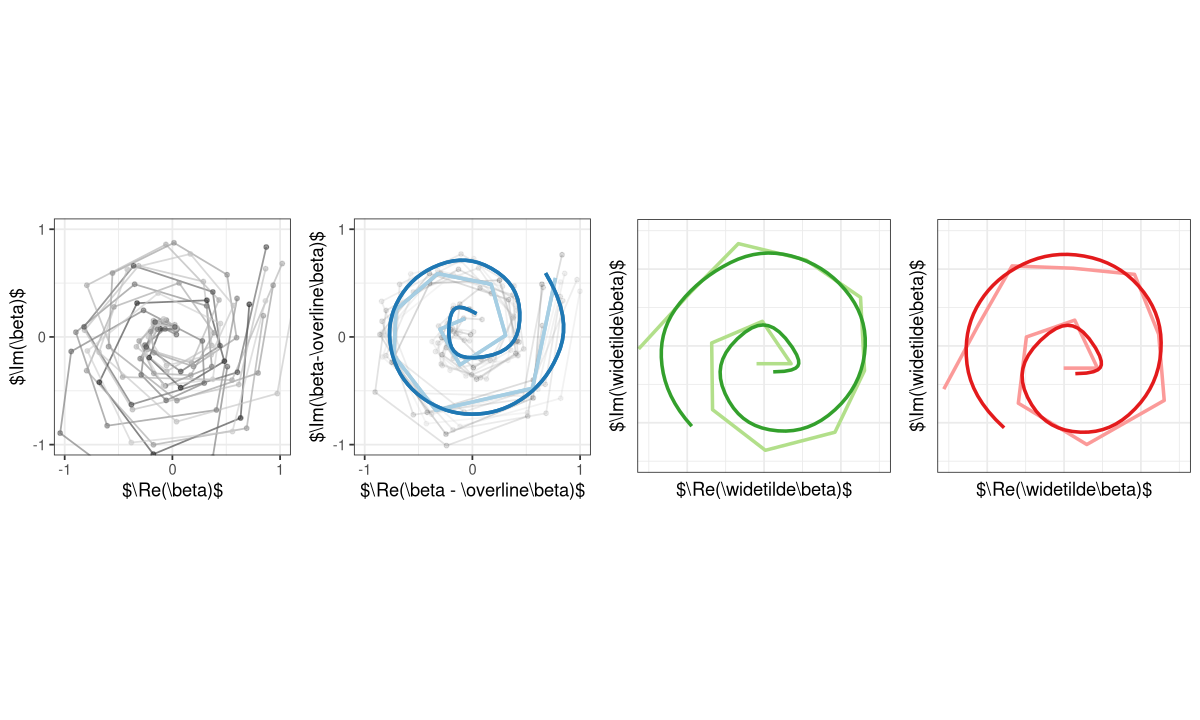

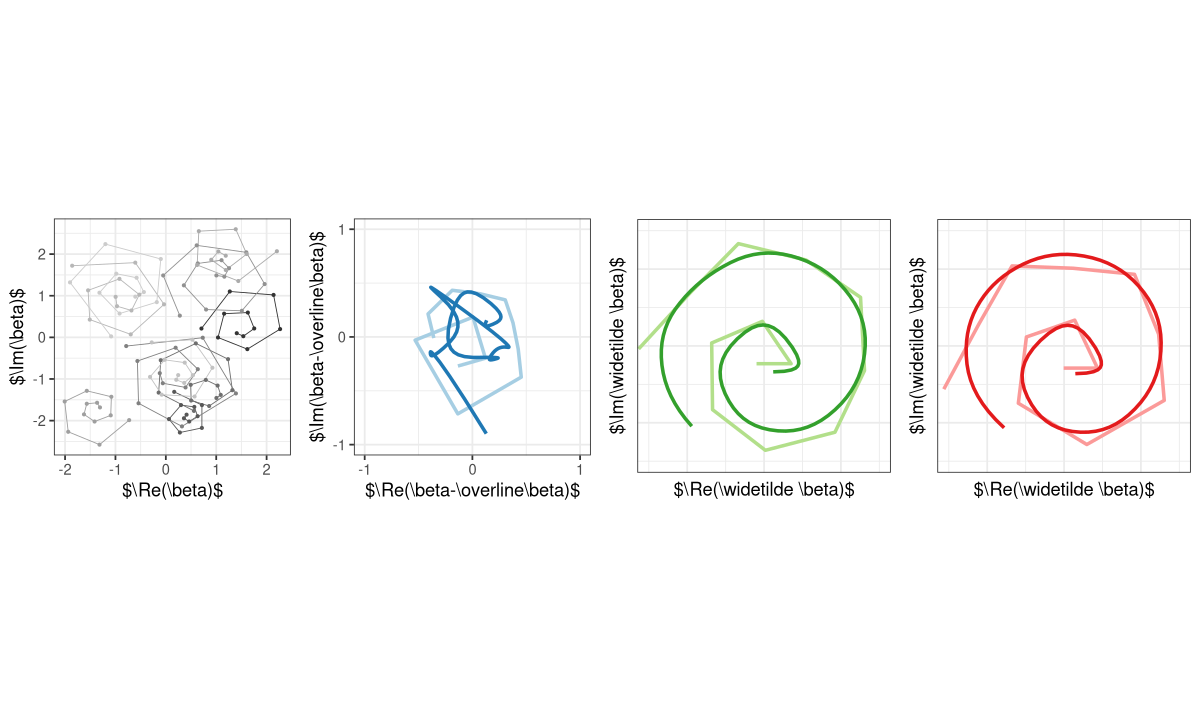

In [16]:
fname = "../tex/graphics/41-spiral-means.tex"
tikzDevice::tikz(file = fname, width = 6, height = 1.66)
grid.arrange(p.spirals, p.means[[1]], p.means[[2]], p.means[[3]], nrow=1)
dev.off()
grid.arrange(p.spirals, p.means[[1]], p.means[[2]], p.means[[3]], nrow=1)
lines <- readLines(con=fname)
lines <- lines[-which(grepl("\\path\\[clip\\]*", lines,perl=F))]
lines <- lines[-which(grepl("\\path\\[use as bounding box*", lines,perl=F))]
writeLines(lines,con=fname)

fname = "../tex/graphics/41-spiral-means-rot.tex"
tikzDevice::tikz(file = fname, width = 6, height = 1.66)
grid.arrange(p.spirals.eucl, p.means.eucl[[1]], p.means.eucl[[2]], p.means.eucl[[3]], nrow=1)
dev.off()
grid.arrange(p.spirals.eucl, p.means.eucl[[1]], p.means.eucl[[2]], p.means.eucl[[3]], nrow=1)
lines <- readLines(con=fname)
lines <- lines[-which(grepl("\\path\\[clip\\]*", lines,perl=F))]
lines <- lines[-which(grepl("\\path\\[use as bounding box*", lines,perl=F))]
writeLines(lines,con=fname)

### Fig. 4.2: Elastic Full Procrustes Mean with different Penalties

In [17]:
means.penalty <- lapply(-1:2, function(p){
    mean.smooth <- compute_elastic_proc2d_mean(spirals.eucl, knots = knots, type = "smooth", penalty = p)
    mean.poly <- compute_elastic_proc2d_mean(spirals.eucl, knots = knots.poly, type = "polygon", penalty = p)
    list(mean.smooth, mean.poly)
})

Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis

png 
  2

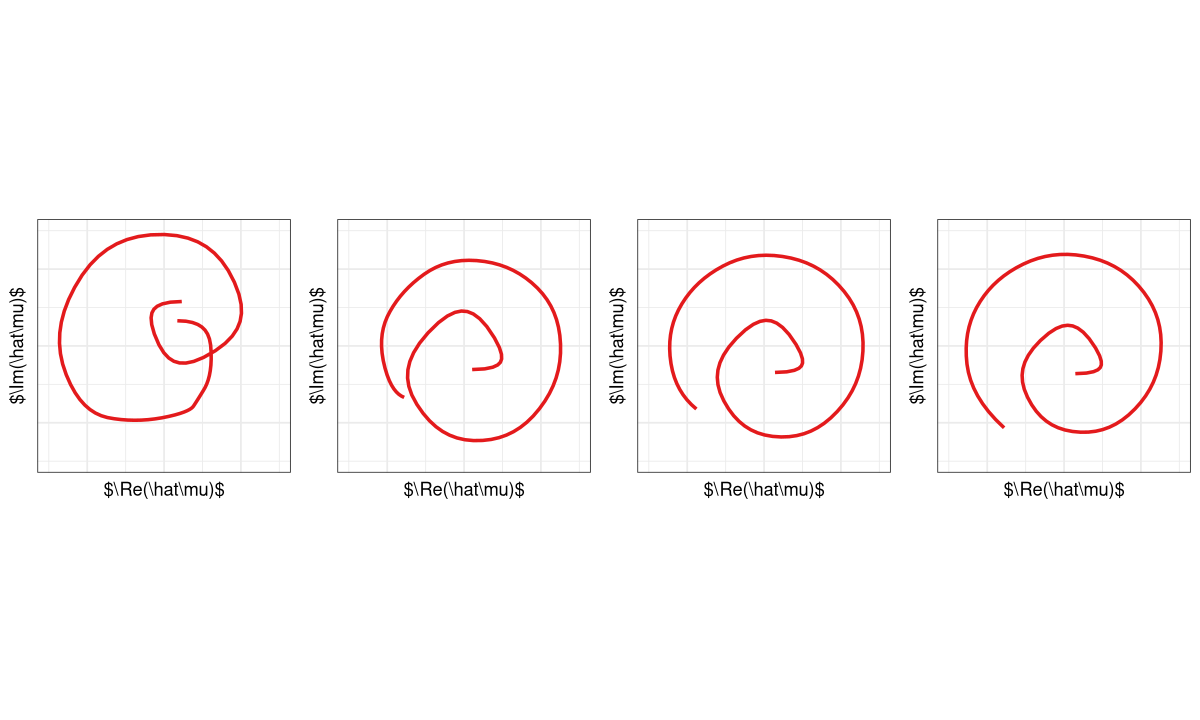

In [67]:
p.penalty <- lapply(1:4, function(i){
    m.s <- get_evals(means.penalty[[i]][[1]])
    m.s <- m.s %>% filter(X1 > -1 & X1 < 1 & X2 > -1 & X2 < 1)  # Fix that strange clip bug...
    m.p <- get_evals(means.penalty[[i]][[2]]) 
    p <- ggplot() + 
        #geom_path(data=m.p, aes(x=X1, y=X2), size=1, color=palette[5]) +
        geom_path(data=m.s, aes(x=X1, y=X2), size=1, color=palette[6]) + 
        theme_thesis() +
        labs(x = "$\\Re(\\hat\\mu)$", y = "$\\Im(\\hat\\mu)$") +
        coord_fixed(xlim=c(-0.15,0.15), ylim=c(-0.15,0.15)) +
        theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
              axis.text.x = element_blank(), axis.text.y = element_blank())
    p
})

fname = "../tex/graphics/41-spiral-pen.tex"
tikzDevice::tikz(file = fname, width = 6, height = 1.5)
grid.arrange(p.penalty[[1]], p.penalty[[2]], p.penalty[[3]], p.penalty[[4]], nrow=1)
dev.off()
grid.arrange(p.penalty[[1]], p.penalty[[2]], p.penalty[[3]], p.penalty[[4]], nrow=1)
lines <- readLines(con=fname)
lines <- lines[-which(grepl("\\path\\[clip\\]*", lines,perl=F))]
lines <- lines[-which(grepl("\\path\\[use as bounding box*", lines,perl=F))]
writeLines(lines,con=fname)

### Table 4.1: Mean distance to estimated mean

In [68]:
dist.means <- lapply(1:3, function(j){
    m.s <- means[[j]][[1]]
    m.p <- means[[j]][[2]]
    dists.s <- sapply(m.s$data_curves, function(curve){
        attr(curve, "dist_to_mean")
    })
    dists.p <- sapply(m.p$data_curves, function(curve){
        attr(curve, "dist_to_mean")
    })
    list(mean(dists.s), mean(dists.p))
})

dist.means.eucl <- lapply(1:3, function(j){
    m.s <- means.eucl[[j]][[1]]
    m.p <- means.eucl[[j]][[2]]
    dists.s <- sapply(m.s$data_curves, function(curve){
        attr(curve, "dist_to_mean")
    })
    dists.p <- sapply(m.p$data_curves, function(curve){
        attr(curve, "dist_to_mean")
    })
    list(mean(dists.s), mean(dists.p))
})

dist.means.penalty<- lapply(1:4, function(j){
    m.s <- means.penalty[[j]][[1]]
    m.p <- means.penalty[[j]][[2]]
    dists.s <- sapply(m.s$data_curves, function(curve){
        attr(curve, "dist_to_mean")
    })
    dists.p <- sapply(m.p$data_curves, function(curve){
        attr(curve, "dist_to_mean")
    })
    list(mean(dists.s), mean(dists.p))
})

In [69]:
dist.means
dist.means.eucl
dist.means.penalty

[[1]]
[[1]][[1]]
[1] 0.8637036

[[1]][[2]]
[1] 0.7794611


[[2]]
[[2]][[1]]
[1] 0.3671988

[[2]][[2]]
[1] 0.4379848


[[3]]
[[3]][[1]]
[1] 0.3418637

[[3]][[2]]
[1] 0.2684645

[[1]]
[[1]][[1]]
[1] 1.982174

[[1]][[2]]
[1] 1.340363


[[2]]
[[2]][[1]]
[1] 0.3671988

[[2]][[2]]
[1] 0.437996


[[3]]
[[3]][[1]]
[1] 0.3418659

[[3]][[2]]
[1] 0.2684484

[[1]]
[[1]][[1]]
[1] 0.3698276

[[1]][[2]]
[1] 0.2661723


[[2]]
[[2]][[1]]
[1] 0.3500158

[[2]][[2]]
[1] 0.269993


[[3]]
[[3]][[1]]
[1] 0.3327862

[[3]][[2]]
[1] 0.2604549


[[4]]
[[4]][[1]]
[1] 0.3418659

[[4]][[2]]
[1] 0.2684484

#### Only for Procrustes, but this time for many many spirals.

In [97]:
eval.grid = c(10,20,40)
n.grid = c(4,8,16,32)
param.grid = expand.grid(evals = eval.grid, n = n.grid)
param.list <- split(param.grid, seq(nrow(param.grid)))

In [98]:
means.grid <- lapply(param.list, function(p){
    set.seed(18)
    spirals <- curves.spiral(n_curves = p$n, rotate=TRUE, scale=TRUE, center=FALSE, translate=TRUE, evals=p$evals:(p$evals+5))
    fp.mean <- compute_elastic_proc2d_mean(spirals, knots = knots.poly, type = "polygon", penalty = penalty, max_iter=0)
    efp.mean <- compute_elastic_proc2d_mean(spirals, knots = knots.poly, type = "polygon", penalty = penalty)
    list(fp.mean, efp.mean)
})

Warning message in fit_mean_proc2d(srv_data_curves = srv_data_curves, knots = knots, :
“Dropping 2 point(s) in mean estimation.”
Warning message in fit_mean_proc2d(srv_data_curves = srv_data_curves, knots = knots, :
“Dropping 4 point(s) in mean estimation.”
Warning message in fit_mean_proc2d(srv_data_curves = srv_data_curves, knots = knots, :
“Dropping 5 point(s) in mean estimation.”
Warning message in sqrt(old_diff/new_diff):
“NaNs produced”
Warning message in fit_mean_proc2d(srv_data_curves = srv_data_curves, knots = knots, :
“Dropping 6 point(s) in mean estimation.”
Warning message in fit_mean_proc2d(srv_data_curves = srv_data_curves, knots = knots, :
“Dropping 8 point(s) in mean estimation.”
Warning message in fit_mean_proc2d(srv_data_curves = srv_data_curves, knots = knots, :
“Dropping 5 point(s) in mean estimation.”
Warning message in fit_mean_proc2d(srv_data_curves = srv_data_curves, knots = knots, :
“Dropping 6 point(s) in mean estimation.”
Warning message in fit_mean_proc2d(sr

In [99]:
dists.grid <- lapply(seq_along(means.grid), function(j){
    m.fp <- means.grid[[j]][[1]]
    m.efp <- means.grid[[j]][[2]]
    dists.fp <- sapply(m.fp$data_curves, function(curve){
        attr(curve, "dist_to_mean")
    })
    dists.efp <- sapply(m.efp$data_curves, function(curve){
        attr(curve, "dist_to_mean")
    })
    list(mean(dists.fp), mean(dists.efp))
})

evals,n
<dbl>,<dbl>
10,4
20,4
40,4
10,8
20,8
40,8
10,16
20,16
40,16
